In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import random as rd
import math
from collections import defaultdict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [19]:
def dist (a, b):
    return math.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)


In [20]:
def myKNN (testData, trainData, k):
    result = []
    for testPoint in testData:
        distance = [[dist(testPoint[0], trainData[i][0]), trainData[i][1]] for i in range(len(trainData))]
        q = [0 for i in range(numberOfClasses)]

        for closedPoint in sorted(distance)[0:k]:
            q[closedPoint[1]] += 1 / closedPoint[0]**2

        result.append(q.index(max(q)))
    return result


In [21]:
def mean(numbers):
    return sum(numbers) / float(len(numbers))  

In [22]:
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
    return math.sqrt(variance)

In [23]:
def summarize(dataset):
    summaries = []
    for i in range(len(dataset[0][0])):
        feat = [dataset[j][0][i] for j in range(len(dataset))]
        summaries.append((mean(feat), stdev(feat)))
    return summaries

In [24]:
def summarizeByClass(dataset):
    summaries = {}
    separated = {}
    for inst in dataset:
        if (inst[-1] not in separated):
            separated[inst[-1]] = []
        separated[inst[-1]].append(inst)

    for classValue, instances in separated.items():
        summaries[classValue] = summarize(instances)
    return summaries

In [25]:
def calculateProbability(x, mean, stdev):
    exponent = math.exp(-((x-mean)**2/(2*stdev**2)))
    return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent

In [26]:
def calculateClassProbabilities(summaries, inputVector):
    probabilities = {}
    for classValue, classSummaries in summaries.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, stdev = classSummaries[i]
            x = inputVector[i]
            probabilities[classValue] *= calculateProbability(x, mean, stdev)
    return probabilities

In [27]:
def predict(summaries, inputVector):
    probabilities = calculateClassProbabilities(summaries, inputVector)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel

In [28]:
def getPredictions(summaries, testSet):
    predictions = []
    for instance in testSet:
        result = predict(summaries, instance[0])
        predictions.append(result)
    return predictions

In [29]:
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet)))

In [30]:
def myBayes(testData, trainData):
    summaries = summarizeByClass(trainData)
    predictions = getPredictions(summaries, testData)
    return predictions

In [35]:
def dataPreparing(dataset, split):
    X1 = dataset[0:71]['Drugs'].values
    Y1 = dataset[0:71]['Weapons'].values
    X2 = dataset[132:205]['Drugs'].values
    Y2 = dataset[132:205]['Weapons'].values

    #graphs
    crims = dataset['Total_crimes']
    plt.plot(crims)
    plt.xlabel('time')
    plt.ylabel('crimes')
    plt.show()
    plt.scatter(X1, Y1)
    plt.scatter(X2,Y2)
    plt.xlabel('Drugs')
    plt.ylabel('Weapons')
    plt.show()

    req_data = []
    for i in range(len(X1)):
        req_data.append([[X1[i], Y1[i]],0])

    for i in range(len(X2)):
        req_data.append([[X2[i], Y2[i]],1])

    trainData =[]
    testData = []
    for i in range (len(req_data)):
        if rd.random() < split:
            trainData.append(req_data[i])
        else:
            testData.append(req_data[i])
    
    return trainData, testData

# Датасет
В лабораторной работе было решено использовать датасет, основанный на статистике преступлений на территории РФ.
Датасет представляет количество совершенных преступлений по различным категориям: угон, мошенничество, с применением оружия и т.д. Ниже представлено как менялось общее число преступлений за последнее время.
Для подготовки датасета необходимо обработать пропущенные значения и сделать парсинг.
В ходе проверки было выявлено, что пропущенных значений в  датасете нет, что говорит о его качестве.
Было решено выделить 2 значимых параметра: преступления, связанные с угонами наркотиками и оружием. Данные можно разделить по временному параметру, преступления, совершенные до 2010 года (класс 0) и после 2012 года (класс 1).


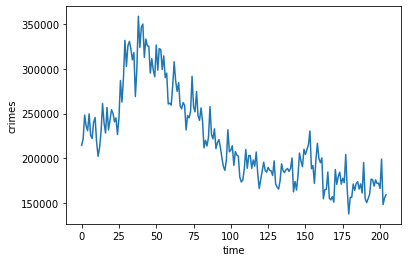

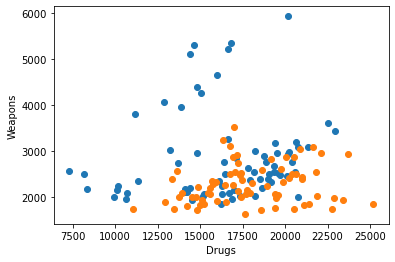

In [36]:
    dataset = pd.read_csv('crime.csv')
    numberOfClasses = 2
    k = 5
    trainData, testData = dataPreparing(dataset, 0.85)
    result = myKNN(testData, trainData, k)
    predictions = myBayes(testData, trainData)

# KNN
Для классификации каждого из объектов тестовой выборки необходимо последовательно выполнить следующие операции:

	Вычислить расстояние до каждого из объектов обучающей выборки
	Отобрать k объектов обучающей выборки, расстояние до которых минимально
	Класс классифицируемого объекта — это класс, наиболее часто встречающийся среди k ближайших соседей
При взвешенном способе во внимание принимается не только количество попавших в область определённых классов, но и их удалённость от нового значения. Для каждого класса j определяется оценка близости:
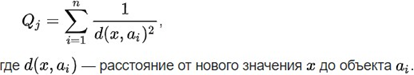

У какого класса выше значение близости, тот класс и присваивается новому объекту.




# Наивный Байесовский классификатор
 
Наивный байесовский классификатор – это семейство алгоритмов классификации, которые принимают одно допущение: Каждый параметр классифицируемых данных рассматривается независимо от других параметров класса. Для этого нужно искать мат. ожидание и дисперсию для каждого атрибута
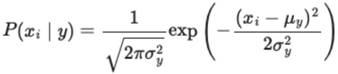

In [37]:
    print('KNN:    ',result)
    print('BAYES:  ', predictions)
    print('true val:  ', [testData[i][1] for i in range(len(testData))])
    accuracy = getAccuracy(testData, predictions)
    accuracyK = getAccuracy(testData, result)
    accuracyB = getAccuracy(testData, predictions)
    print('KNN accuracy = ', accuracyK, ' BAYES accuracy = ', accuracyB, '\n')

    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    X = []
    Y = []
    for i in range(len(trainData)):
        X.append(trainData[i][0])
        Y.append(trainData[i][1])

    knn.fit(X, Y)
    answ1 = knn.predict([testData[i][0] for i in range(len(testData))])
    print('sklearnKnn:', answ1)
    print('accuracy = ', getAccuracy(testData, answ1), '\n')

    nb = GaussianNB()
    nb.fit(X, Y)
    answ2 = nb.predict([testData[i][0] for i in range(len(testData))])
    print('sklearnNB: ', answ2)
    print('accuracy = ', getAccuracy(testData, answ2))

KNN:     [0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1]
BAYES:   [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]
true val:   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
KNN accuracy =  0.6  BAYES accuracy =  0.72 

sklearnKnn: [0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1]
accuracy =  0.64 

sklearnNB:  [0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1]
accuracy =  0.72


# Вывод
Как видно из данного примера, точности реализованных алгоритмов и sklearn совпадают. При повторении генерации тестовых данных можно заметить, что алгоритм KNN допускает на 1-2 ошибки больше, чем аналог sklearn. А алгоритмы NB работают с одинаковой точностью.